**Exercise 2.5 (programming)** Design and conduct an experiment to demonstrate the difficulties that sample-average methods have for nonstationary problems. Use a modified version of the 10-armed testbed in which all the q*(a) start out equal and then take independent random walks(say by adding a normally distributed increment with mean zero and standard deviation 0.01 to all the $q_{\star}(a)$ on each step). Prepare plots like the Figure 2.2 for an action-value method using a constant step-size parameter, $\alpha=0.1$. Use $\epsilon=0.1$ and longer runs, say of 10,000 steps.

Text(0,0.5,u'%Optimal Action')

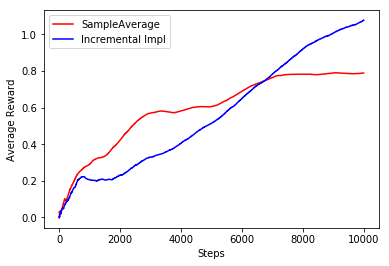

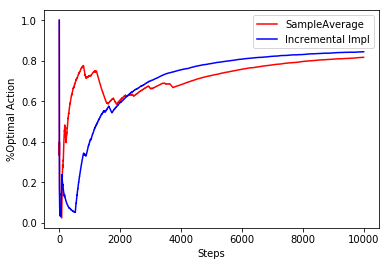

In [32]:
import numpy as np
import matplotlib.pyplot as plt

steps = 10000
alpha = 0.1
epsilon = 0.1
arms = 10
mu = 0
sigma = 0.01

q = np.zeros((2, arms))
Q = np.zeros((2, arms))
S = np.zeros((2, arms))
A = np.zeros((arms, ), dtype = int)

Average_Reward = np.zeros((2, steps))
Optimal_Action_Per = np.zeros((2, steps))
match_optimal_step = [0, 0]

np.random.seed(10)

def bandit(method, arm):
    q[method, :] += np.random.normal(mu, sigma, arms)
    return q[method, arm]

def sample_average(arm):
    A[arm] += 1
    R = bandit(0, arm)
    S[0, arm] += R
    Q[0, arm] = S[0, arm] / A[arm]

def incremental_impl(arm):
    R = bandit(1, arm)
    S[1, arm] += R
    Q[1, arm] = Q[1, arm] + alpha * (R - Q[1, arm])
    
def pick_arm(method, step):
    if np.random.random() < epsilon:
        return np.random.randint(0, arms)
    else:
        return np.argmax(Q[method, :])
    
for step in range(steps):
    arm = pick_arm(0, step)
    #print arm, np.argmax(q[0, :])
    if arm == np.argmax(q[0, :]):
        match_optimal_step[0] += 1
    sample_average(arm)
    Average_Reward[0, step] = np.sum(S[0, :]) / (step + 1.0)
    Optimal_Action_Per[0, step] = match_optimal_step[0] / (step + 1.0)
    
    arm = pick_arm(1, step)
    if arm == np.argmax(q[1, :]):
        match_optimal_step[1] += 1
    incremental_impl(arm)
    Average_Reward[1, step] = np.sum(S[1, :]) / (step + 1.0)
    Optimal_Action_Per[1, step] = match_optimal_step[1] / (step + 1.0)

plt.figure(1)
plt.plot(range(1, steps + 1), Average_Reward[0, :], 'r') 
plt.plot(range(1, steps + 1), Average_Reward[1, :], 'b') 
plt.legend(('SampleAverage', 'Incremental Impl'))
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.figure(2)
plt.plot(range(1, steps + 1), Optimal_Action_Per[0, :], 'r')
plt.plot(range(1, steps + 1), Optimal_Action_Per[1, :], 'b')
plt.legend(('SampleAverage', 'Incremental Impl'))
plt.xlabel('Steps')
plt.ylabel('%Optimal Action')